# Flight price prediction

## Questions
a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df_clean = pd.read_csv('./data/Clean_Dataset.csv')
df_business = pd.read_csv('./data/business.csv')
df_business['stop'] = df_business['stop'].str.replace(r'\s+', ' ', regex=True)
df_economy = pd.read_csv('./data/economy.csv')

In [3]:
df_clean

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df_business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop,17:00,Hyderabad,"81,585"


In [5]:
df_economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


## Removing useless data

In [6]:
# Checking for empty values ​​in table df_clean
df_clean.empty

False

In [7]:
# Removed Unnamed: 0 and flight from the df_clean
df_clean.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [8]:
# Checking for empty values ​​in table df_business
df_business.empty

False

In [9]:
# Removed num_code from the df_business
df_business.drop(columns=['num_code'], inplace=True)

In [10]:
# Checking for empty values ​​in table df_economy
df_economy.empty

False

In [11]:
# Removed num_code from the df_economy
df_economy.drop(columns=['num_code'], inplace=True)

## Basic Statistics

### Clean dataset

In [12]:
# Printing the unique values ​​of individual columns
for col in df_clean.columns:
    if len(df_clean[col].unique()) > 50:
        print(f'{col}: {len(df_clean[col].unique())} unique values')
    else:
        print(f'{col}: {df_clean[col].unique()}')
    print()

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

stops: ['zero' 'one' 'two_or_more']

arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

class: ['Economy' 'Business']

duration: 476 unique values

days_left: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

price: 12157 unique values



In [13]:
# Column statistics in df_clean
df_clean.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [14]:
# Schedule of individual airlines
df_clean['airline'].value_counts().to_frame()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


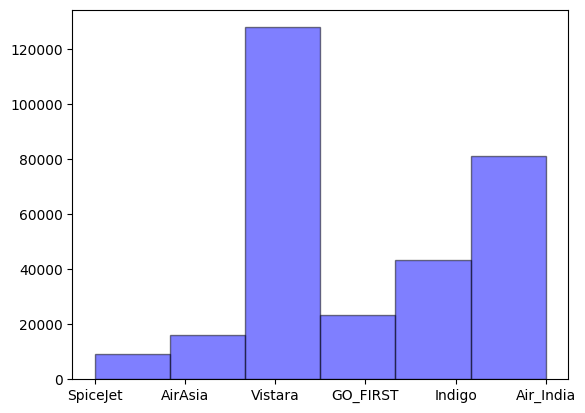

In [15]:
# Schedule of individual airline in the form of a histogram
plt.hist(df_clean['airline'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['airline'].unique()))
plt.show()

In [16]:
# Schedule of individual source city
df_clean['source_city'].value_counts().to_frame()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


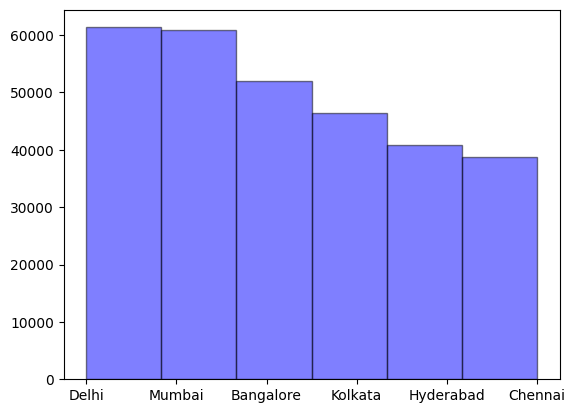

In [17]:
# Schedule of individual source_city in the form of a histogram
plt.hist(df_clean['source_city'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['source_city'].unique()))
plt.show()

In [18]:
# Schedule of individual departure time
df_clean['departure_time'].value_counts().to_frame()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


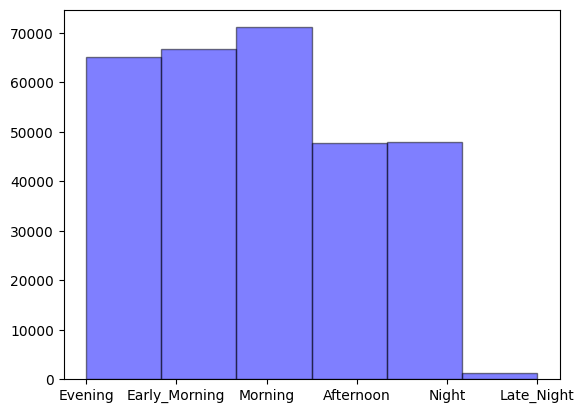

In [19]:
# Schedule of individual departure time in the form of a histogram
plt.hist(df_clean['departure_time'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['departure_time'].unique()))
plt.show()

In [20]:
# Schedule of individual stops
df_clean['stops'].value_counts().to_frame()

,count
stops,
one,250863
zero,36004
two_or_more,13286


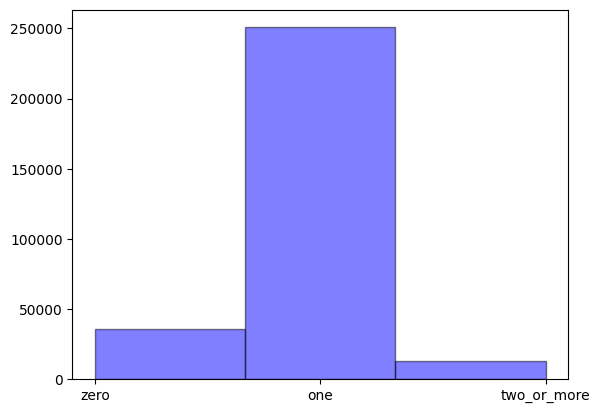

In [21]:
# Schedule of individual stops in the form of a histogram
plt.hist(df_clean['stops'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['stops'].unique()))
plt.show()

In [22]:
# Schedule of individual arrival time
df_clean['arrival_time'].value_counts().to_frame()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


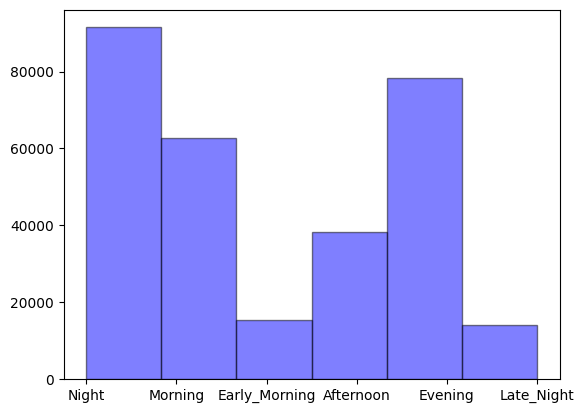

In [23]:
# Schedule of individual arrival times in the form of a histogram
plt.hist(df_clean['arrival_time'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['arrival_time'].unique()))
plt.show()

In [24]:
# Schedule of individual destination city
df_clean['destination_city'].value_counts().to_frame()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


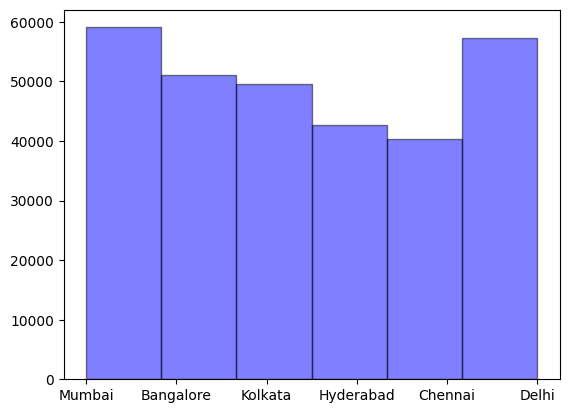

In [25]:
# Schedule of individual destination_city in the form of a histogram
plt.hist(df_clean['destination_city'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['destination_city'].unique()))
plt.show()

In [26]:
# Schedule of individual class
df_clean['class'].value_counts().to_frame()

,count
class,
Economy,206666
Business,93487


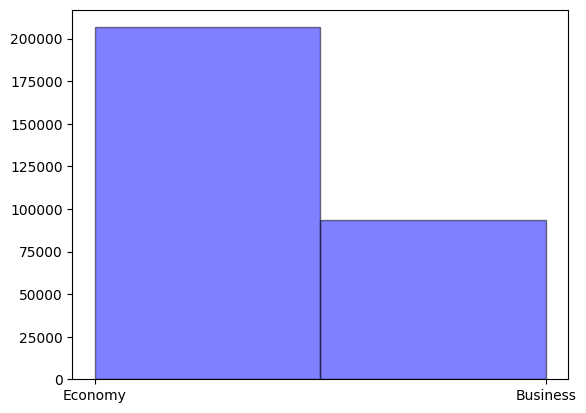

In [27]:
# Schedule of individual class in the form of a histogram
plt.hist(df_clean['class'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['class'].unique()))
plt.show()

In [28]:
# Schedule of individual class
df_clean['days_left'].value_counts().to_frame()

,count
days_left,
25,6633
18,6602
39,6593
32,6585
26,6573
24,6542
19,6537
31,6534
33,6532


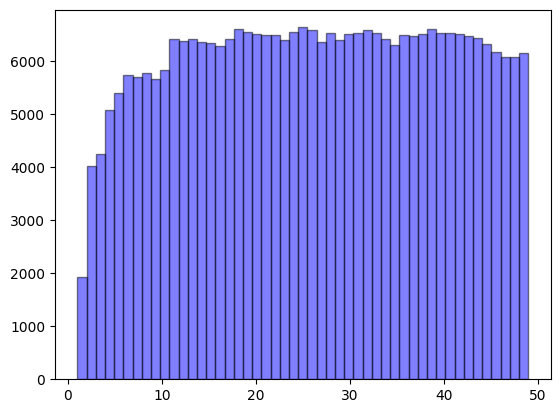

In [29]:
# Schedule of individual days_left in the form of a histogram
plt.hist(df_clean['days_left'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['days_left'].unique()))
plt.show()

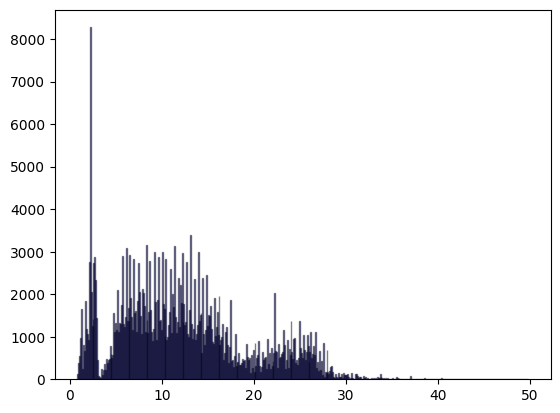

In [30]:
# Schedule of individual duration in the form of a histogram
plt.hist(df_clean['duration'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['duration'].unique()))
plt.show()

### Business dataset

In [31]:
# Printing the unique values ​​of individual columns in df_business
for col in df_business.columns:
    if len(df_business[col].unique()) > 50:
        print(f'{col}: {len(df_business[col].unique())} unique values')
    else:
        print(f'{col}: {df_business[col].unique()}')
    print()

date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']

airline: ['Air India' 'Vistara']

ch_code: ['AI' 'UK']

dep_time: 166 unique values

from: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

time_taken: 373 unique values

stop: ['non-stop ' '1-stop ' '1-stop Via IDR ' '1-stop Via IXU '
 '1-stop Via Chennai ' '1-stop Via Lucknow ' '1-stop Via STV '
 '1-stop Via Hyderabad ' '1-sto

In [32]:
# Schedule of individual airlines
df_business['airline'].value_counts().to_frame()

,count
airline,
Vistara,60589
Air India,32898


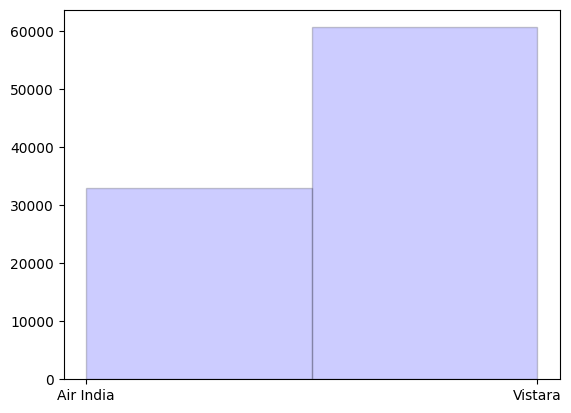

In [33]:
# Schedule of individual airline in the form of a histogram
plt.hist(df_business['airline'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['airline'].unique()))
plt.show()

In [34]:
# Schedule of individual airlines
df_business['ch_code'].value_counts().to_frame()

,count
ch_code,
UK,60589
AI,32898


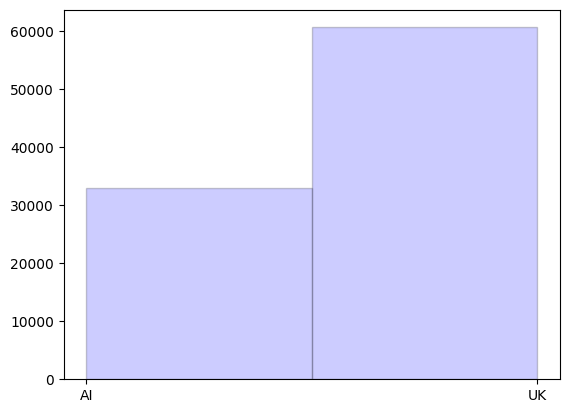

In [35]:
# Schedule of individual from in the form of a histogram
plt.hist(df_business['ch_code'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['ch_code'].unique()))
plt.show()

In [36]:
# Schedule of individual from
df_business['from'].value_counts().to_frame()

,count
from,
Mumbai,19858
Delhi,18316
Bangalore,16441
Kolkata,13473
Hyderabad,12870
Chennai,12529


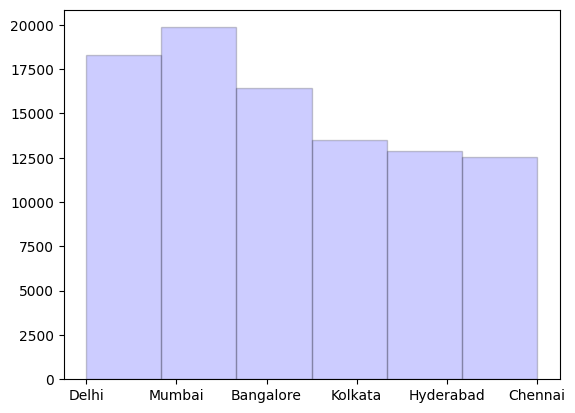

In [37]:
# Schedule of individual from in the form of a histogram
plt.hist(df_business['from'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['from'].unique()))
plt.show()

In [38]:
# Schedule of individual to
df_business['to'].value_counts().to_frame()

,count
to,
Mumbai,18991
Delhi,16707
Bangalore,16198
Kolkata,14758
Hyderabad,13675
Chennai,13158


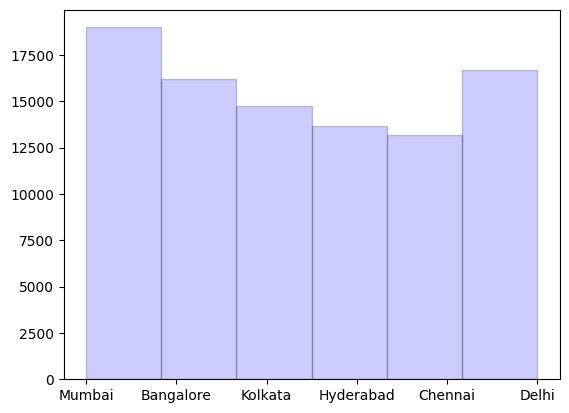

In [39]:
# Schedule of individual to in the form of a histogram
plt.hist(df_business['to'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['to'].unique()))
plt.show()

### Economy dataset

In [40]:
# Printing the unique values ​​of individual columns in df_economy
for col in df_economy.columns:
    if len(df_economy[col].unique()) > 50:
        print(f'{col}: {len(df_economy[col].unique())} unique values')
    else:
        print(f'{col}: {df_economy[col].unique()}')
    print()

date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']

ch_code: ['SG' 'I5' 'UK' 'G8' '6E' 'AI' '2T' 'S5']

dep_time: 251 unique values

from: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

time_taken: 483 unique values

stop: ['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t

In [41]:
# Schedule of individual airlines
df_economy['airline'].value_counts().to_frame()

,count
airline,
Vistara,67270
Air India,47996
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


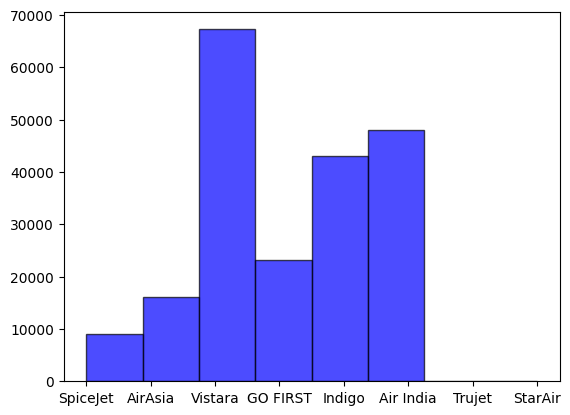

In [42]:
# Schedule of individual airline in the form of a histogram
plt.hist(df_economy['airline'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['airline'].unique()))
plt.show()

In [43]:
# Schedule of individual ch_code
df_economy['ch_code'].value_counts().to_frame()

,count
ch_code,
UK,67270
AI,47996
6E,43120
G8,23177
I5,16098
SG,9011
S5,61
2T,41


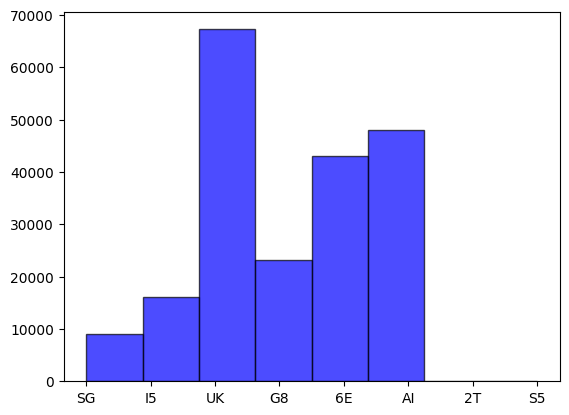

In [44]:
# Schedule of individual ch_code in the form of a histogram
plt.hist(df_economy['ch_code'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['ch_code'].unique()))
plt.show()

In [45]:
# Schedule of individual from
df_economy['from'].value_counts().to_frame()

,count
from,
Delhi,43029
Mumbai,41045
Bangalore,35665
Kolkata,32874
Hyderabad,27990
Chennai,26171


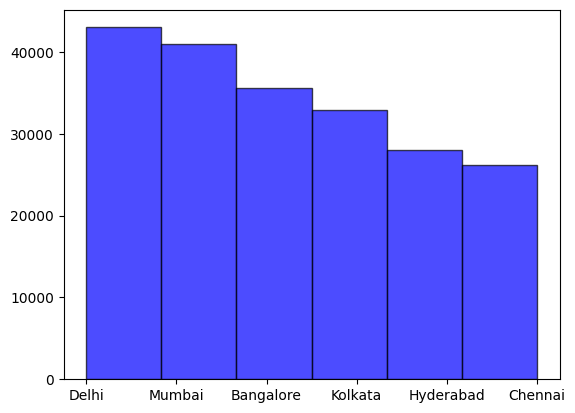

In [46]:
# Schedule of individual from in the form of a histogram
plt.hist(df_economy['from'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['from'].unique()))
plt.show()

In [47]:
# Schedule of individual to
df_economy['to'].value_counts().to_frame()

,count
to,
Delhi,40654
Mumbai,40118
Bangalore,34914
Kolkata,34777
Hyderabad,29101
Chennai,27210


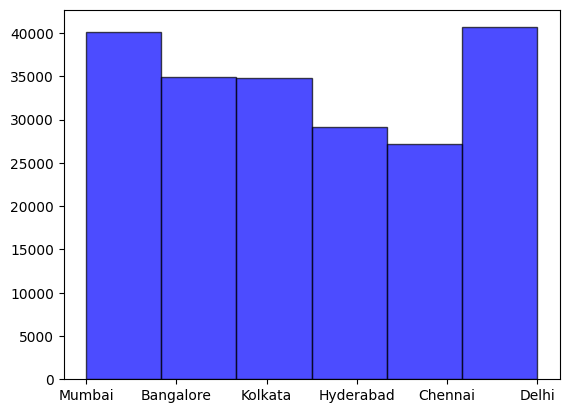

In [48]:
# Schedule of individual to in the form of a histogram
plt.hist(df_economy['to'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['to'].unique()))
plt.show()

## Missing and duplicates values

In [49]:
# Checking if there are duplicates in table df_clean
df_clean.duplicated().any()

True

In [50]:
df_economy

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [51]:
df_clean.drop_duplicates()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [52]:
# Checking if there are duplicates in table df_business
df_business.duplicated().any()

False

In [53]:
# Checking if there are duplicates in table df_economy
df_economy.duplicated().any()

True

In [54]:
# Removing duplicates in df_economy (2)
df_economy.drop_duplicates()

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [55]:
# Replace empty strings to NaN
df_clean.replace('', None, inplace=True)

# Checking if df_clean has a NaN values
is_na_df_clean = df_clean.isna().any()
is_na_df_clean

airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [56]:
# Replace empty strings to NaN
df_business.replace('', None, inplace=True)

# Checking if df_business has a NaN values
is_na_df_business = df_business.isna().any()
is_na_df_business

date          False
airline       False
ch_code       False
dep_time      False
from          False
time_taken    False
stop          False
arr_time      False
to            False
price         False
dtype: bool

In [57]:
# Replace empty strings to NaN
df_economy.replace('', None, inplace=True)

# Checking if df_economy has a missing values
is_na_df_economy = df_economy.isna().any()
is_na_df_economy

date          False
airline       False
ch_code       False
dep_time      False
from          False
time_taken    False
stop          False
arr_time      False
to            False
price         False
dtype: bool

## Standardise and normalize data

In [58]:
# df_clean columns types                                                                                                             
df_clean_column_types = df_clean.dtypes
df_clean_column_types

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [59]:
# df_business columns types                                                                                                             
df_business_column_types = df_business.dtypes
df_business_column_types

date          object
airline       object
ch_code       object
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [60]:
# df_economy columns types                                                                                                             
df_economy_column_types = df_economy.dtypes
df_economy_column_types

date          object
airline       object
ch_code       object
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

## 

In [61]:
from scipy.stats import shapiro
# Check of duration normal distribution of df_clean
columns_to_check = [df_clean["days_left"], df_clean["duration"], df_clean["price"]]
for column in columns_to_check:
    stat, p = shapiro(column)
    print("Test stat:", stat)
    print("Value of p:", p)
    if p > 0.05:
        print("The distribution of " + column.name + " is close to normal")
    else:
        print("The distribution of " + column.name + " is not close to normal")

Test stat: 0.9590064287185669
Value of p: 0.0
The distribution of days_left is not close to normal
Test stat: 0.9569688439369202
Value of p: 0.0
The distribution of duration is not close to normal
Test stat: 0.7521858811378479
Value of p: 0.0
The distribution of price is not close to normal


c:\Users\mateuszban\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
# Changing format 'nnh nnm' (where 'n' is number) to the minutes
def time_taken_to_int(row):
    if row is not None:
        hour_minute = row.split('h')
        if len(hour_minute) == 2:
            hour = hour_minute[0].strip()
            minute = hour_minute[1].split('m')[0].strip()
            if hour.isdigit() and minute.isdigit():
                return int(hour) * 60 + int(minute)
            else:
                return None
    else:
        return None


In [63]:
# Convert price in df_business and df_economy to int
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
df_business['price'] = df_business['price'].apply(lambda x: locale.atoi(x))
df_economy['price'] = df_economy['price'].apply(lambda x: locale.atoi(x))

In [64]:
# Changing time_taken of df_business to the minutes
df_business['time_taken'] = df_business['time_taken'].apply(lambda x: time_taken_to_int(x))

In [65]:
# Check of duration normal distribution of df_business
columns_to_check = [df_business["time_taken"]]
for column in columns_to_check:
    stat, p = shapiro(column)
    print("Test stat:", stat)
    print("Value of p:", p)
    if p > 0.05:
        print("The distribution of " + column.name + " is close to normal")
    else:
        print("The distribution of " + column.name + " is not close to normal")

Test stat: 0.9755829572677612
Value of p: 0.0
The distribution of time_taken is not close to normal


In [66]:
# Changing time_taken of df_economy to the minutes
df_economy['time_taken'] = df_economy['time_taken'].apply(lambda x: time_taken_to_int(x))

In [67]:
# Remove None rows
df_economy.dropna(subset=['time_taken'], inplace=True)
df_economy.isna().any()

date          False
airline       False
ch_code       False
dep_time      False
from          False
time_taken    False
stop          False
arr_time      False
to            False
price         False
dtype: bool

In [68]:
# Check of duration normal distribution of df_economy
columns_to_check = [df_economy["time_taken"]]
for column in columns_to_check:
    stat, p = shapiro(column)
    print("Test stat:", stat)
    print("Value of p:", p)
    if p > 0.05:
        print("The distribution of " + column.name + " is close to normal")
    else:
        print("The distribution of " + column.name + " is not close to normal")

Test stat: 0.940815269947052
Value of p: 0.0
The distribution of time_taken is not close to normal


c:\Users\mateuszban\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [69]:
# Standardize df_clean(duration, days_left and price)
df_clean_numeric = df_clean[["duration", "days_left", "price"]]

df_clean[["duration", "days_left", "price"]] = (df_clean_numeric - df_clean_numeric.mean()) / df_clean_numeric.std()

In [70]:
df_clean

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,-1.386405,-1.843872,-0.657979
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,-0.297695,1.695689,2.131282
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,-0.250420,1.695689,2.476690
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,0.223718,1.695689,2.564540
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,-0.308818,1.695689,2.674067


In [71]:
# Standardize df_business(time_taken)
df_business_numeric = df_business[["time_taken"]]

df_business[["time_taken"]] = (df_business_numeric - df_business_numeric.mean()) / df_business_numeric.std()

In [72]:
df_business

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,18:00,Delhi,-1.708028,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,19:00,Delhi,-1.671545,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,20:00,Delhi,1.611939,1-stop,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,21:25,Delhi,1.867321,1-stop,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,17:15,Delhi,-1.027009,1-stop,23:55,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,09:45,Chennai,-0.528406,1-stop,19:50,Hyderabad,69265
93483,31-03-2022,Vistara,UK,12:30,Chennai,-0.479762,1-stop,22:55,Hyderabad,77105
93484,31-03-2022,Vistara,UK,07:05,Chennai,0.018841,1-stop,20:55,Hyderabad,79099
93485,31-03-2022,Vistara,UK,07:00,Chennai,-0.540567,1-stop,17:00,Hyderabad,81585


In [73]:
# Standardize df_economy(time_taken)
df_economy_numeric = df_economy[["time_taken"]]

df_economy[["time_taken"]] = (df_economy_numeric - df_economy_numeric.mean()) / df_economy_numeric.std()

In [74]:
df_economy

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,-1.295089,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,06:20,Delhi,-1.272076,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,04:25,Delhi,-1.295089,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,10:20,Delhi,-1.283582,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,08:50,Delhi,-1.272076,non-stop,11:10,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697
206770,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709
206771,31-03-2022,Vistara,UK,12:30,Chennai,1.247894,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640
206772,31-03-2022,Vistara,UK,09:45,Chennai,1.627615,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640


## Encoding categorical variables

In [75]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()

df_clean_encoded = pd.get_dummies(df_clean, columns=['airline', 'source_city', 'stops', 'destination_city'], dtype=int)
df_clean_encoded['arrival_time'] = label_encoder.fit_transform(df_clean_encoded['arrival_time'])
df_clean_encoded['departure_time'] = label_encoder.fit_transform(df_clean_encoded['departure_time'])
df_clean_encoded['class'] = label_encoder.fit_transform(df_clean_encoded['class']) 
df_clean_encoded

,departure_time,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2,5,1,-1.397528,-1.843872,-0.658067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,4,1,-1.375282,-1.843872,-0.658067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,-1.397528,-1.843872,-0.657935,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,0,1,-1.386405,-1.843872,-0.657979,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,4,1,-1.375282,-1.843872,-0.657979,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,4,2,0,-0.297695,1.695689,2.131282,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300149,0,5,0,-0.250420,1.695689,2.476690,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300150,1,5,0,0.223718,1.695689,2.564540,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300151,1,2,0,-0.308818,1.695689,2.674067,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [76]:
df_business_encoded = pd.get_dummies(df_business, columns=['airline', 'ch_code', 'from', 'stop', 'to'], dtype=int)
df_business_encoded

,date,dep_time,time_taken,arr_time,price,airline_Air India,airline_Vistara,ch_code_AI,ch_code_UK,from_Bangalore,...,stop_1-stop Via Surat,stop_1-stop Via VTZ,stop_2+-stop,stop_non-stop,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,18:00,-1.708028,20:00,25612,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,11-02-2022,19:00,-1.671545,21:15,25612,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,11-02-2022,20:00,1.611939,20:45,42220,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11-02-2022,21:25,1.867321,23:55,44450,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11-02-2022,17:15,-1.027009,23:55,46690,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,09:45,-0.528406,19:50,69265,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93483,31-03-2022,12:30,-0.479762,22:55,77105,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93484,31-03-2022,07:05,0.018841,20:55,79099,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93485,31-03-2022,07:00,-0.540567,17:00,81585,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
df_economy_encoded = pd.get_dummies(df_economy, columns=['airline', 'ch_code', 'from', 'stop', 'to'], dtype=int)
df_economy_encoded

,date,dep_time,time_taken,arr_time,price,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,...,stop_1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t,stop_1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t,stop_2+-stop,stop_non-stop,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,18:55,-1.295089,21:05,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,11-02-2022,06:20,-1.272076,08:40,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,11-02-2022,04:25,-1.295089,06:35,5956,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,11-02-2022,10:20,-1.283582,12:35,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,11-02-2022,08:50,-1.272076,11:10,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,07:05,0.315850,20:55,7697,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206770,31-03-2022,07:05,0.315850,20:55,7709,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206771,31-03-2022,12:30,1.247894,09:05,8640,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206772,31-03-2022,09:45,1.627615,09:05,8640,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Outlier data

In [78]:
def remove_outliers_by_iqr(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [79]:
df_clean_encoded = remove_outliers_by_iqr(df_clean_encoded, 'price')
df_clean_encoded

,departure_time,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2,5,1,-1.397528,-1.843872,-0.658067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,4,1,-1.375282,-1.843872,-0.658067,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,-1.397528,-1.843872,-0.657935,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,0,1,-1.386405,-1.843872,-0.657979,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,4,1,-1.375282,-1.843872,-0.657979,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,4,2,0,-0.297695,1.695689,2.131282,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300149,0,5,0,-0.250420,1.695689,2.476690,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300150,1,5,0,0.223718,1.695689,2.564540,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300151,1,2,0,-0.308818,1.695689,2.674067,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [80]:
df_business_without_outliers = remove_outliers_by_iqr(df_business, 'price')
df_business_without_outliers

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,18:00,Delhi,-1.708028,non-stop,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,19:00,Delhi,-1.671545,non-stop,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,20:00,Delhi,1.611939,1-stop,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,21:25,Delhi,1.867321,1-stop,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,17:15,Delhi,-1.027009,1-stop,23:55,Mumbai,46690
...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,09:45,Chennai,-0.528406,1-stop,19:50,Hyderabad,69265
93483,31-03-2022,Vistara,UK,12:30,Chennai,-0.479762,1-stop,22:55,Hyderabad,77105
93484,31-03-2022,Vistara,UK,07:05,Chennai,0.018841,1-stop,20:55,Hyderabad,79099
93485,31-03-2022,Vistara,UK,07:00,Chennai,-0.540567,1-stop,17:00,Hyderabad,81585


In [81]:
df_economy_without_outliers = remove_outliers_by_iqr(df_economy, 'price')
df_economy_without_outliers

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,-1.295089,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,06:20,Delhi,-1.272076,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,04:25,Delhi,-1.295089,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,10:20,Delhi,-1.283582,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,08:50,Delhi,-1.272076,non-stop,11:10,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7697
206770,31-03-2022,Vistara,UK,07:05,Chennai,0.315850,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,7709
206771,31-03-2022,Vistara,UK,12:30,Chennai,1.247894,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640
206772,31-03-2022,Vistara,UK,09:45,Chennai,1.627615,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640


### Transforming

## Data visualization

### Price Differences vs. Departure and Arrival Times

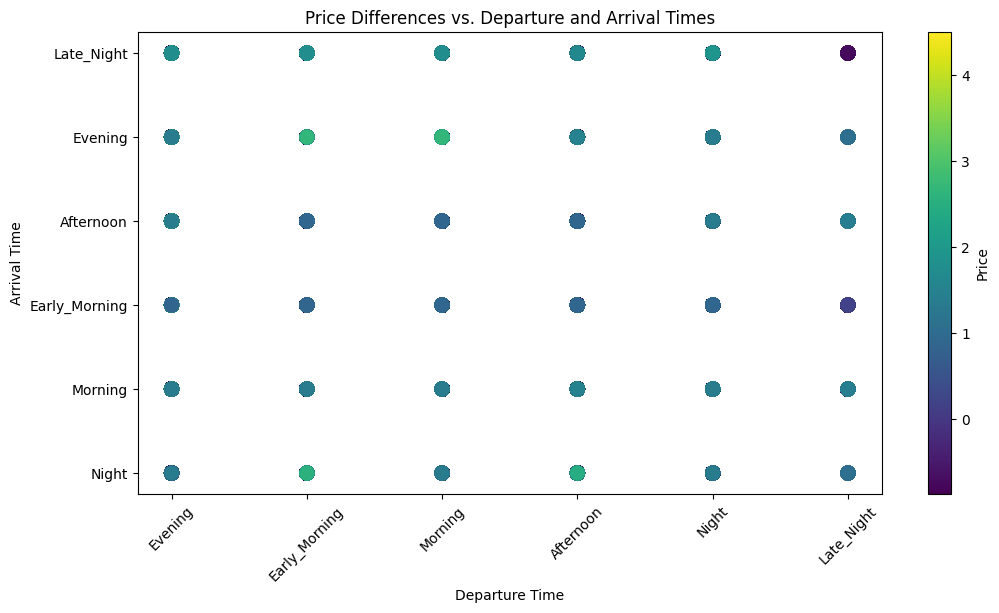

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['departure_time'], df_clean['arrival_time'], c=df_clean['price'], cmap='viridis', s=100)
plt.colorbar(label='Price')
plt.xlabel('Departure Time')
plt.ylabel('Arrival Time')
plt.title('Price Differences vs. Departure and Arrival Times')
plt.xticks(rotation=45)
plt.show()

### Average Price Differences by Departure Time

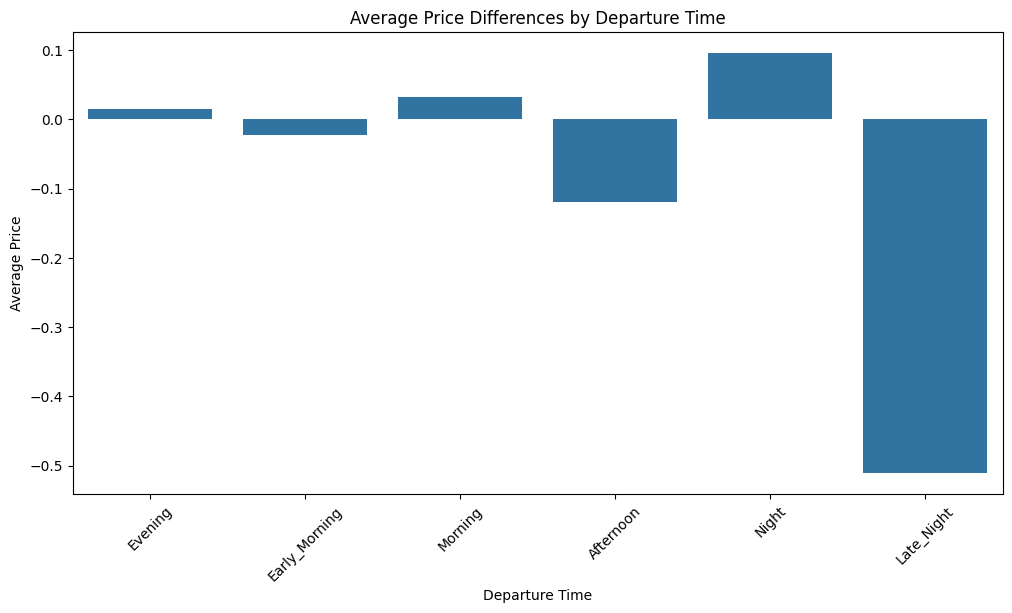

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x='departure_time', y='price', data=df_clean, estimator=np.mean, errorbar=None)
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Average Price Differences by Departure Time')
plt.xticks(rotation=45)
plt.show()

### Average Price Differences by Arrival Time

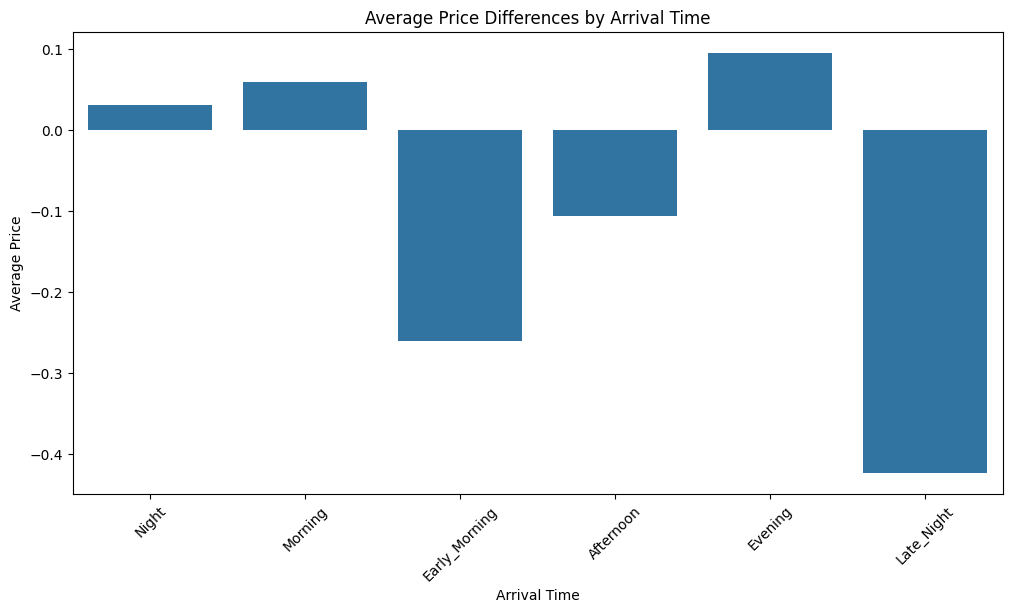

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_time', y='price', data=df_clean, estimator=np.mean, errorbar=None)
plt.xlabel('Arrival Time')
plt.ylabel('Average Price')
plt.title('Average Price Differences by Arrival Time')
plt.xticks(rotation=45)
plt.show()

### Comparing Flight Prices between Source Cities and Destination Cities

Text(0.5, 1.0, 'Comparing Flight Prices between Source Cities and Destination Cities')

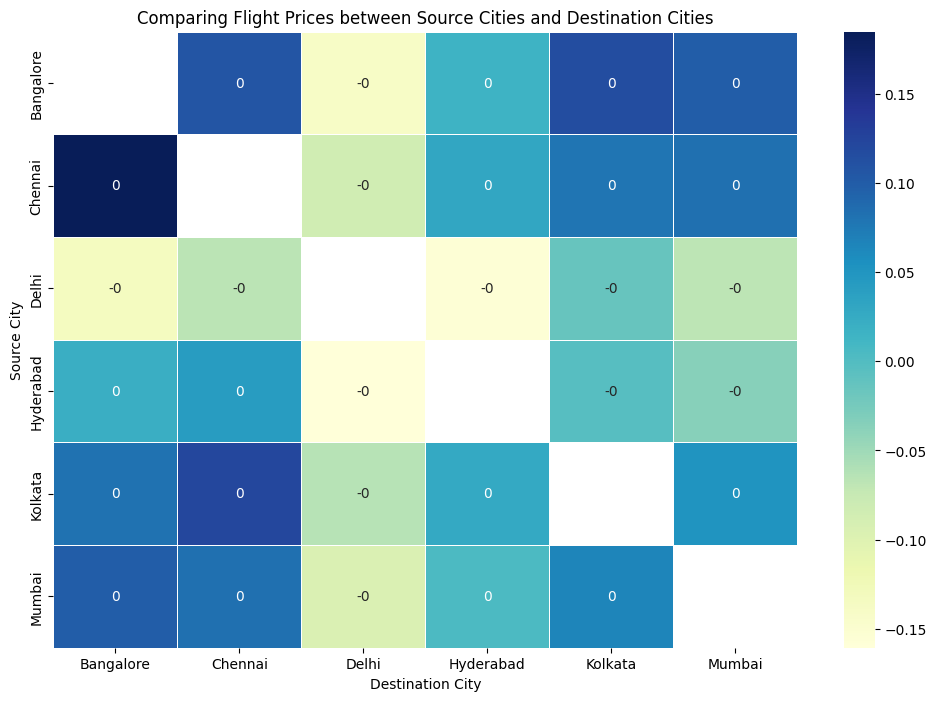

In [85]:
pivot_table = df_clean.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.title('Comparing Flight Prices between Source Cities and Destination Cities')

### Name of feature2 [chart/hist/dot etc...]

.

.

.

### Name of featureN [chart/hist/dot etc...]

## Varble effect on the outcome

### Categorical

### Numerical

## Developing new features

In [86]:
# Develop new feature price_of_hour_of_flight in df_clean
df_clean["price_of_hour_of_flight"] = df_clean["price"] / df_clean["duration"]

In [87]:
# Develop new feature price_rating in df_clean describing whether the price is above or below the average
df_clean["price_rating"] = np.where(df_clean['price'] > 20889.660523, 'Above average', 'Below average')

## Selecting most important features [not necessary]

## Split train test

In [88]:
df_clean_encoded.drop(['price'], axis= 1)

,departure_time,arrival_time,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,source_city_Mumbai,stops_one,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2,5,1,-1.397528,-1.843872,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,4,1,-1.375282,-1.843872,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,-1.397528,-1.843872,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,0,1,-1.386405,-1.843872,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,4,1,-1.375282,-1.843872,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,4,2,0,-0.297695,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300149,0,5,0,-0.250420,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300150,1,5,0,0.223718,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
300151,1,2,0,-0.308818,1.695689,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [89]:
from sklearn.model_selection import train_test_split as tts


X = df_clean_encoded.drop(['price'], axis= 1)
y = df_clean_encoded['price']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)


# Machine Learning

## Model implementation

### Neural networks

In [90]:
from keras.models import Sequential
from keras.layers import Dense

nn = Sequential()
nn.add(Dense(64, input_dim=26, activation='relu'))
nn.add(Dense(1, activation='linear'))  # warstwa wyjściowa z jednym neuronem dla regresji
nn.compile(loss='mean_squared_error', optimizer='adam')
nn.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# K nearest regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

### Gradient Boosting Regressor

In [92]:
# XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(verbose= True)

## Testing

In [93]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def test_model(model, X_train, y_train, X_test, y_test):
    """
    Przeprowadza testy efektywności dla modeli regresji.

    Parametry:
    - models: Słownik, gdzie klucz to nazwa modelu, a wartość to obiekt modelu.
    - X_train, y_train: Zbiór treningowy.
    - X_test, y_test: Zbiór testowy.

    Wyniki:
    - Wydrukuje metryki dla każdego modelu (MSE i R2 score).
    - Wyświetli wykres rzeczywistych vs przewidywanych wartości dla każdego modelu.
    """
    # Trenowanie modelu
    model.fit(X_train, y_train)

    # Predykcja na zbiorze testowym
    y_pred = model.predict(X_test)

    # Obliczenie metryk
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Wydruk metryk
    # print(f"\nModel: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R2 Score: {r2}")

    # Wykres rzeczywistych vs przewidywanych wartości
    plt.scatter(y_test, y_pred, alpha=0.5)
    # plt.title(f'Real vs Predicted values - {model_name}')
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.show()


1876/1876 [==============================] - 2s 1ms/step
Mean Squared Error (MSE): 0.0452259264288001
R2 Score: 0.9543319210765268


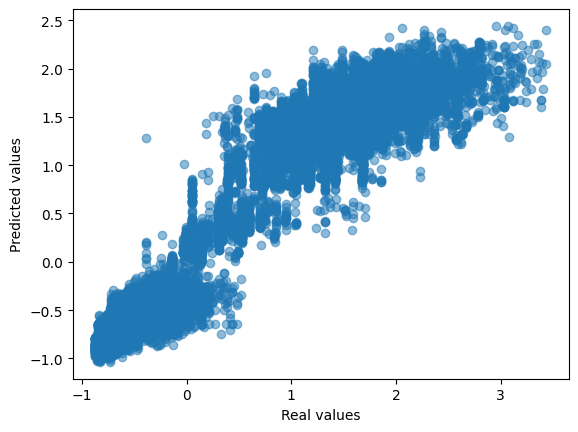

In [94]:
test_model(nn, X_train, y_train, X_test, y_test)

c:\Users\mateuszban\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (MSE): 0.022119038391250054
R2 Score: 0.9776647142308248


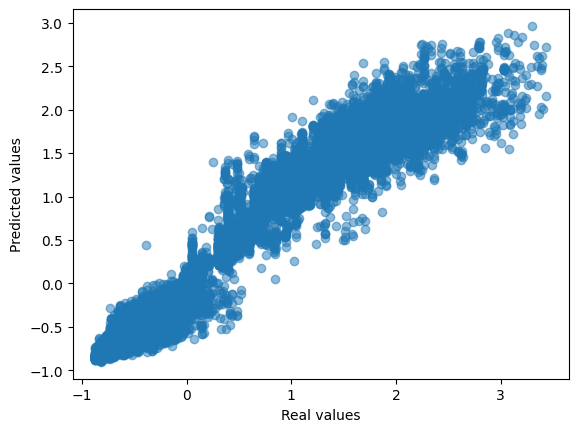

In [95]:
test_model(xgb, X_train, y_train, X_test, y_test)

Mean Squared Error (MSE): 0.031040479198416487
R2 Score: 0.9686560527159703


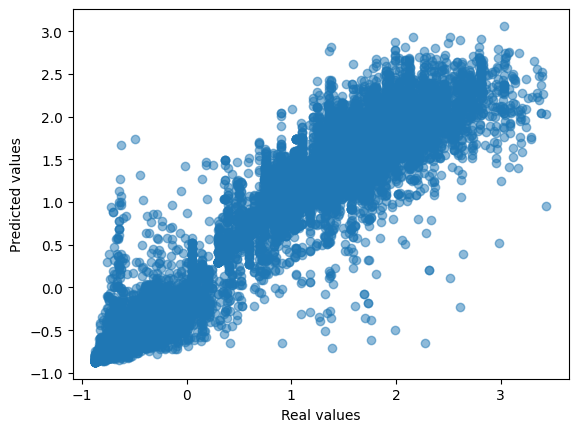

In [96]:
test_model(knr, X_train, y_train, X_test, y_test)

# Quality

In [97]:
from sklearn.metrics import confusion_matrix

def model_effectivness(model, X_train, y_train, X_test, y_test):
    # Trenowanie modelu
    model.fit(X_train, y_train)

    # Predykcja na zbiorze testowym
    y_pred = model.predict(X_test)
    
    

    # Obliczenie metryk
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return [mse, mae, r2]

In [98]:
def plot_effectivness(effectivness, suptitle, dependency):
    # Przykładowe dane
    x = range(len(effectivness['mse']))
    y1 = effectivness['mse']
    y2 = effectivness['mae']
    y3 = effectivness['r2']

    # Rysowanie trzech wykresów na jednym obszarze
    plt.figure(figsize=(15, 5))  # Ustawienie rozmiaru obszaru rysowania

    # Pierwszy wykres
    plt.subplot(1, 3, 1)
    plt.plot(x, y1, label='mse')
    plt.title('Wykres wartości mean sqaure error')
    plt.xlabel(dependency)
    plt.ylabel('mse')
    plt.legend()

    # Drugi wykres
    plt.subplot(1, 3, 2)
    plt.plot(x, y2, label='mae', color='orange')
    plt.title('Wykres wartości mean absolute error')
    plt.xlabel(dependency)
    plt.ylabel('mae')
    plt.legend()

    # Trzeci wykres
    plt.subplot(1, 3, 3)
    plt.plot(x, y3, label='r2', color='green')
    plt.title('Wykres wartości r2')
    plt.xlabel(dependency)
    plt.ylabel('r2')
    plt.legend()

    # Dostosowanie układu i wyświetlenie wykresów
    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

In [99]:
from sklearn.metrics import confusion_matrix
 
def con_matrix(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predykcja na zbiorze testowym
    y_true_binary = (y_test > 0.5).astype(int)

    y_pred_prob = model.predict(X_test)
    y_pred_binary = (y_pred_prob > 0.5).astype(int)
    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)
    return conf_matrix

## Neural Network

In [100]:
effectivness = {
    'mse': [],
    'mae': [],
    'r2': []
}
for i in range(64, 79):
    nn_test = Sequential()
    nn_test.add(Dense(i, input_dim= 26, activation='relu'))
    nn_test.add(Dense(1, activation='linear'))  # warstwa wyjściowa z jednym neuronem dla regresji
    nn_test.compile(loss='mean_squared_error', optimizer='adam')
    nn_test.summary()
    result = model_effectivness(nn_test, X_train, y_train, X_test, y_test)
    effectivness['mse'].append(result[0])
    effectivness['mae'].append(result[1])
    effectivness['r2'].append(result[2])
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1728      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1876/1876 [==============================] - 2s 1ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 65)                1755      
                                                                 
 dense_5 (Dense)             (None, 1)                 66        
         

In [101]:
effectivness

{'mse': [0.04102596339521018,
  0.04146383735613,
  0.0413650960273515,
  0.042555966996893964,
  0.04325981183499626,
  0.04197179107421481,
  0.04202265406937771,
  0.04138081889809747,
  0.041582471947175244,
  0.04411313045126084,
  0.042316438616514705,
  0.042908956140042774,
  0.044371638674508745,
  0.044478375007223105,
  0.043493773572075595],
 'mae': [0.12883783884604333,
  0.12601379599431392,
  0.12719166516094593,
  0.12639183489022257,
  0.13571011852629508,
  0.12379911443258182,
  0.12848207155877586,
  0.12546348057620535,
  0.12506690042832577,
  0.14096059111185502,
  0.12892095538145654,
  0.12956405758723102,
  0.13593530472177404,
  0.14360636238892224,
  0.13633186756055476],
 'r2': [0.9585729451624704,
  0.9581307903149118,
  0.9582304969909655,
  0.9570279834391346,
  0.9563172574429091,
  0.9576178705735442,
  0.9575665103149316,
  0.9582146204051478,
  0.958010995889574,
  0.9554555963340805,
  0.9572698535752123,
  0.9566715432880671,
  0.9551945607981863,


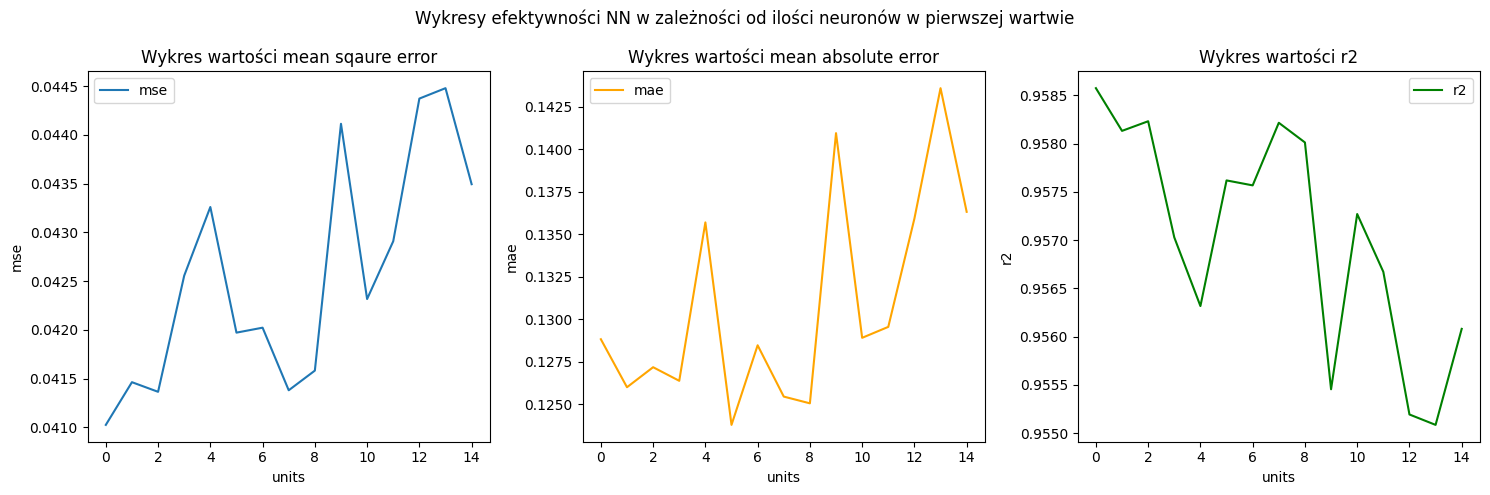

In [102]:
plot_effectivness(effectivness, 'Wykresy efektywności NN w zależności od ilości neuronów w pierwszej wartwie', 'units')

In [103]:
best_value = effectivness['mse'].index(min(effectivness['mse']))

nn_test = Sequential()
nn_test.add(Dense(64+best_value, input_dim= 26, activation='relu'))
nn_test.add(Dense(1, activation='linear'))  # warstwa wyjściowa z jednym neuronem dla regresji
nn_test.compile(loss='mean_squared_error', optimizer='adam')
nn_test.summary()

print(con_matrix(nn_test, X_train, y_train, X_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                1728      
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1876/1876 [==============================] - 3s 1ms/step
[[42517   261]
 [  382 16846]]


## XGBoost

In [104]:
import xgboost as xgb
effectivness = {
    'mse': [],
    'mae': [],
    'r2': []
}
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

for i in range(15):

    params = {
        'learning_rate': i/10,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse'
    }


    xgb_test = xgb.XGBRegressor(**params)
    result = model_effectivness(xgb_test, X_train, y_train, X_test, y_test)
    effectivness['mse'].append(result[0])
    effectivness['mae'].append(result[1])
    effectivness['r2'].append(result[2])


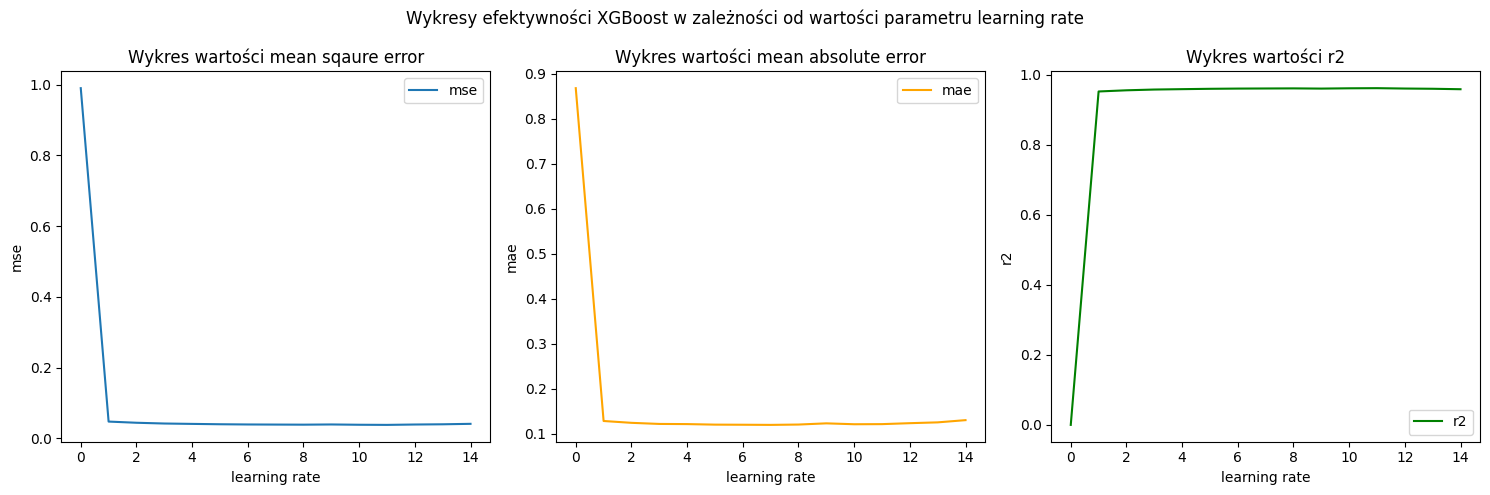

In [105]:
plot_effectivness(effectivness, 'Wykresy efektywności XGBoost w zależności od wartości parametru learning rate', 'learning rate')

In [106]:
best_value = effectivness['mse'].index(min(effectivness['mse']))

params = {
        'learning_rate': best_value/10,
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse'
    }


xgb_test = xgb.XGBRegressor(**params)

print(con_matrix(xgb_test, X_train, y_train, X_test, y_test))

[[42490   288]
 [  264 16964]]


In [107]:
effectivness = {
    'mse': [],
    'mae': [],
    'r2': []
}
params = {
    'alpha': 0,
    'lambda': 0
}
for i in range(15):
# Sposób 2: Dodanie Regularyzacji
    params['alpha'] = i/10  # Dodaj regularyzację L1
    params['lambda'] = 0.1  # Dodaj regularyzację L2

    xgb_test = xgb.XGBRegressor(**params)
    result = model_effectivness(xgb_test, X_train, y_train, X_test, y_test)
    effectivness['mse'].append(result[0])
    effectivness['mae'].append(result[1])
    effectivness['r2'].append(result[2])
    

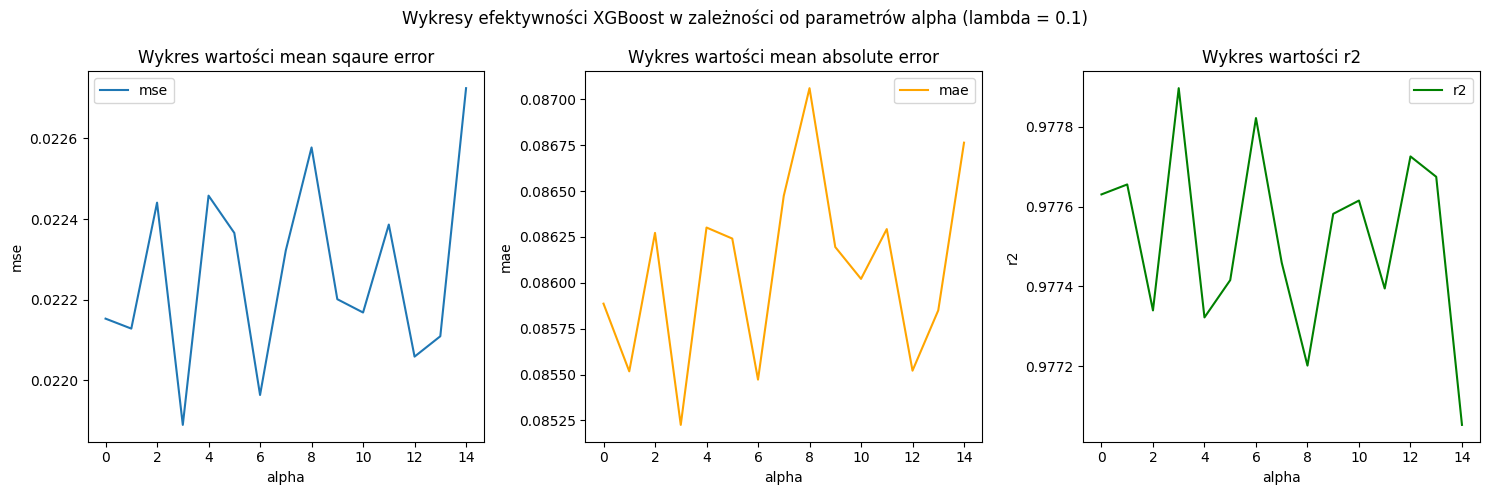

In [108]:
plot_effectivness(effectivness, 'Wykresy efektywności XGBoost w zależności od parametrów alpha (lambda = 0.1)', 'alpha')

In [109]:
best_value = effectivness['mse'].index(min(effectivness['mse']))


params = {
    'alpha': best_value/10,
    'lambda': 0.1
}

xgb_test = xgb.XGBRegressor(**params)

print(con_matrix(xgb_test, X_train, y_train, X_test, y_test))

[[42545   233]
 [  117 17111]]


In [110]:
effectivness = {
    'mse': [],
    'mae': [],
    'r2': []
}
params = {
    'alpha': 0,
    'lambda': 0
}
for i in range(15):
# Sposób 2: Dodanie Regularyzacji
    params['alpha'] = 0.1  # Dodaj regularyzację L1
    params['lambda'] = i/10  # Dodaj regularyzację L2

    xgb_test = xgb.XGBRegressor(**params)
    result = model_effectivness(xgb_test, X_train, y_train, X_test, y_test)
    effectivness['mse'].append(result[0])
    effectivness['mae'].append(result[1])
    effectivness['r2'].append(result[2])
    

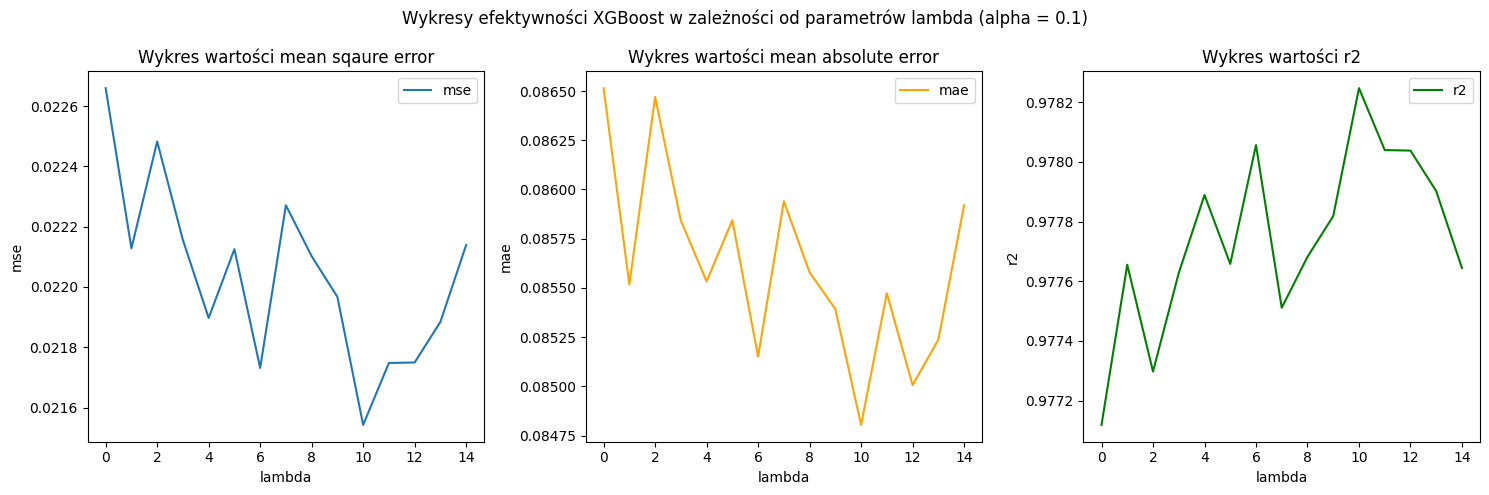

In [111]:
plot_effectivness(effectivness, 'Wykresy efektywności XGBoost w zależności od parametrów lambda (alpha = 0.1)', 'lambda')


In [112]:
best_value = effectivness['mse'].index(min(effectivness['mse']))


params = {
    'alpha': 0.1,
    'lambda': best_value/10
}

xgb_test = xgb.XGBRegressor(**params)

print(con_matrix(xgb_test, X_train, y_train, X_test, y_test))

[[42548   230]
 [  118 17110]]


## KNR

In [113]:
effectivness = {
    'mse': [],
    'mae': [],
    'r2': []
}
for i in range(100):
    knn_test = KNeighborsRegressor(n_neighbors= i+1)
    result = model_effectivness(knn_test, X_train, y_train, X_test, y_test)
    effectivness['mse'].append(result[0])
    effectivness['mae'].append(result[1])
    effectivness['r2'].append(result[2])
    
print(effectivness)

{'mse': [0.04074933739614208, 0.029711421133293676, 0.028691145669603006, 0.029809618337165562, 0.031040479198416487, 0.03261697585301658, 0.03405433051641657, 0.03530250502102075, 0.03668005533158167, 0.03797495353592102, 0.03948357270882448, 0.04100113212320635, 0.04276025478377525, 0.04461413696954875, 0.046616437364195906, 0.04866134937585327, 0.050879822613390115, 0.0532598888308676, 0.055903083258896376, 0.05862081116965645, 0.06147388805616665, 0.0646562394829859, 0.0678178990717908, 0.0713140477361949, 0.07477670233836872, 0.07810676290372637, 0.08154115955152479, 0.08482341185513662, 0.08809829598810533, 0.0913229583986658, 0.09438318445337457, 0.09745953148381101, 0.10052228074058289, 0.10339591295154366, 0.10612378259016518, 0.1087625139072442, 0.11140417898999676, 0.11396228164613599, 0.11636333103922657, 0.1187016958527184, 0.1211399539207948, 0.12356595998391119, 0.1259601197863377, 0.12835337916323267, 0.13064420921825542, 0.13292535633698502, 0.1351557844153004, 0.13729

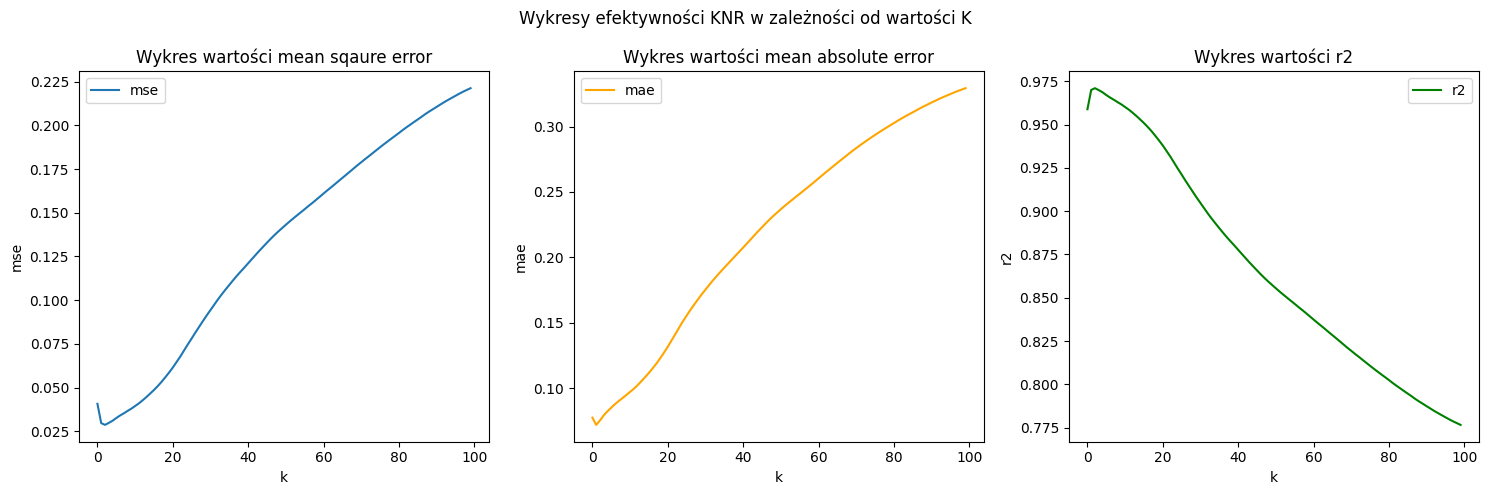

In [114]:
plot_effectivness(effectivness, 'Wykresy efektywności KNR w zależności od wartości K', 'k')

In [115]:
best_value = effectivness['mse'].index(min(effectivness['mse']))


knn_test = KNeighborsRegressor(n_neighbors= best_value+1)

print(con_matrix(knn_test, X_train, y_train, X_test, y_test))

[[42606   172]
 [  151 17077]]
